In [1]:
import matplotlib.pyplot as plt
from train import train_network
import preprocess as pp

C:\Users\alexa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from load_data import load_dataset

dataset = load_dataset("../models/focusData.csv")
dataset

[(tensor([-0.0002,  0.0079, -0.0038, -0.0008,  0.0031,  0.0033,  0.0081, -0.0127,
           0.0303,  0.0093, -0.0005,  0.0017,  0.0055, -0.0012, -0.0039,  0.0180,
           0.0171,  0.0034,  0.0007, -0.0067,  0.0075,  0.0064,  0.0034,  0.0005,
           0.0061,  0.0078,  0.0040,  0.0081, -0.0064, -0.0132, -0.0081,  0.0052]),
  0),
 (tensor([-4.0550e-03,  4.0684e-03, -4.6647e-03, -3.6627e-04,  1.0961e-03,
           2.2018e-04,  3.6367e-03, -1.4428e-02,  3.0833e-02,  1.0477e-02,
           9.6092e-04, -1.5081e-03,  3.3239e-03, -1.5008e-03, -3.8570e-03,
           1.8341e-02,  1.4756e-02,  3.1568e-03,  8.2266e-04, -7.8869e-03,
           4.5646e-03,  2.4705e-03, -1.9342e-03, -3.7471e-03,  8.0677e-03,
           1.1660e-02, -8.6052e-05,  3.4916e-03, -1.0971e-02, -1.8256e-02,
          -8.2419e-03,  1.2274e-03]),
  0),
 (tensor([-0.0050,  0.0044, -0.0014,  0.0012,  0.0037, -0.0003,  0.0029, -0.0108,
           0.0294,  0.0100, -0.0004, -0.0037,  0.0013, -0.0043, -0.0073,  0.0163,
      

100%|██████████| 100/100 [00:47<00:00,  2.12it/s]


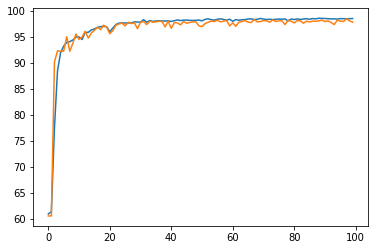

In [3]:
train_set, test_set = pp.split_data(dataset)

network, train_accuracies, test_accuracies = train_network(train_set, test_set, epoch=100, batch_size=32, learning_rate=0.05)

plt.plot(train_accuracies)
plt.plot(test_accuracies)